# Sales Channel Data Analysis

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

# Problem Statement

Build a model which can predict the sales based on the money spent on different marketing platforms.

# Target Variable

 The target variable is Sales. It is a continous data. So we are supposed to use Linear Regression

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
chl_df=pd.read_csv('advertising.csv')
chl_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
chl_df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


About The Columns

TV, radio, newspaper:
    
    These columns represents the money spent on each platform for 
    advertising.

In [5]:
chl_df.shape

(200, 5)

In [6]:
chl_df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Data Exploration

In [7]:
chl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Check For Null values

In [8]:
chl_df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

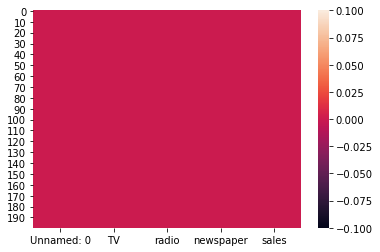

In [9]:
sns.heatmap(chl_df.isnull())

The dataset is clean with no null values, so we shall proceed with data analysis.

# Drop The Column

In [12]:
chl_df=chl_df.drop(columns='Unnamed: 0', axis=1)

In [13]:
chl_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


The column 'Unnamed: 0' has no impact with the sales, so this column is deleted.

# Data Visualization

In [19]:
k= chl_df.columns[0:3]

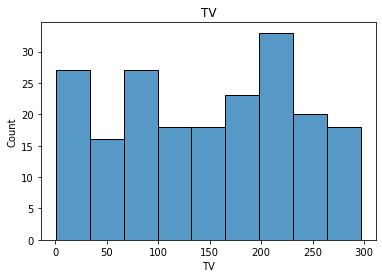

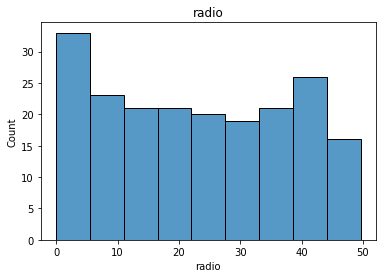

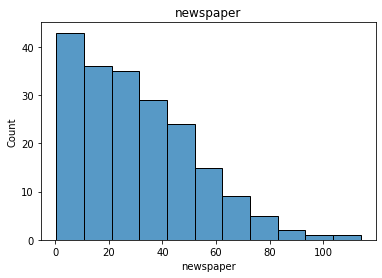

In [20]:
for i in k:
    sns.histplot(chl_df[i])
    plt.title(i)
    plt.show()

TV: The amount spend on advertising in TV is found to be all ranges.
    
Radio: The amount spent on radio for advertising is also found in all ranges but is less compared to TV.
    
NewsPaper: The amount spen on newspaper advertisements seems to be very low and the range is also between 1 to 20 thousands.

<AxesSubplot:xlabel='TV', ylabel='sales'>

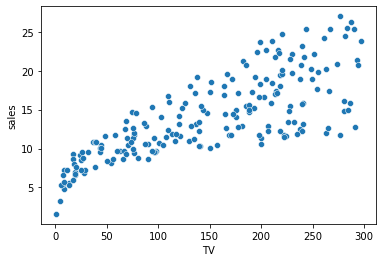

In [22]:
sns.scatterplot(x='TV', y='sales', data=chl_df)

With increase in the amount spent on advertising, total sales also has considerable increase.

<AxesSubplot:xlabel='radio', ylabel='sales'>

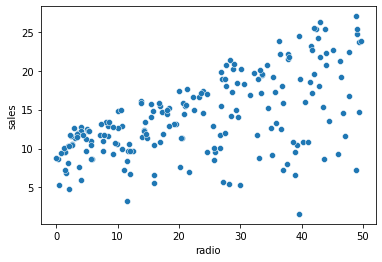

In [23]:
sns.scatterplot(x='radio', y='sales', data=chl_df)

Investing money on radio advertisements also has some contribution towards total sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

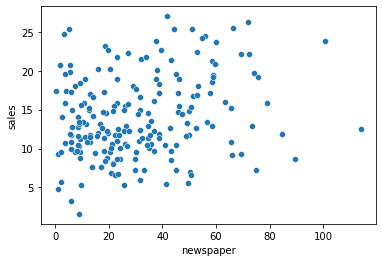

In [24]:
sns.scatterplot(x='newspaper', y='sales', data=chl_df)

In Newspaper, Less amount is spent for advertising.

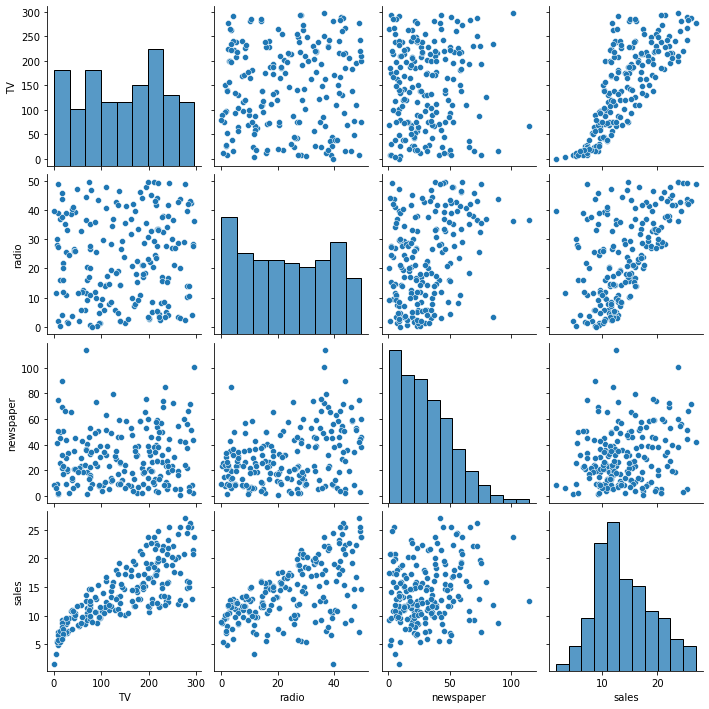

In [25]:
sns.pairplot(chl_df)

Total Sales(target) seems to be highly correlated with TV. 

Little correlation is found with radio but newspaper has no correlation with sales or any other columns

Find Description of data

In [26]:
chl_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In newspaper column mean is higher than the median, so there may be high skewness.

There seems to be large gap between 75th percentile and maximum values, so there are outliers in all columns

# To Find Correlation

In [27]:
chl_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

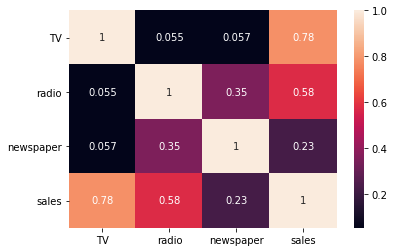

In [29]:
sns.heatmap(chl_df.corr(),annot=True)

TV seems to be highly correlated with sales. 

Radio has mild collinearity with sales.

Newspaper has less collinearity with sales.

No columns are highly correlated to each other. So, there is no problem of multicollinearity.

# Check For Skewness

In [35]:
df1=chl_df.iloc[:,0:-1]
df1

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
df1.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

In [37]:
k= df1.columns

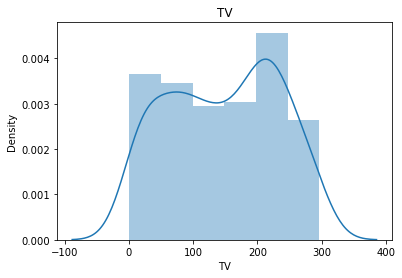

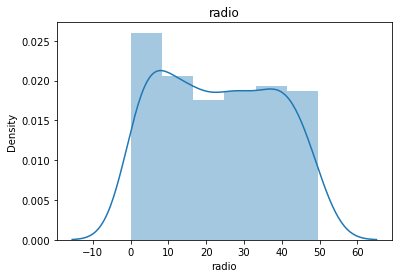

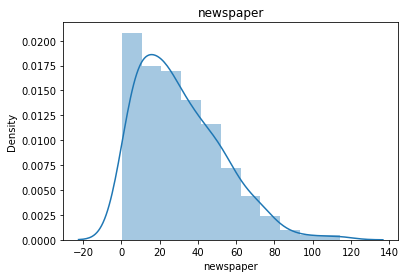

In [38]:
for i in k:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

The data contains skewness in all columns. 

The threshold limit is set to be -0.5 to 0.5

In [40]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [42]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [43]:
df1.skew().sort_values(ascending=False)

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [44]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [45]:
skewed_data=df1.skew()
skewed_data

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

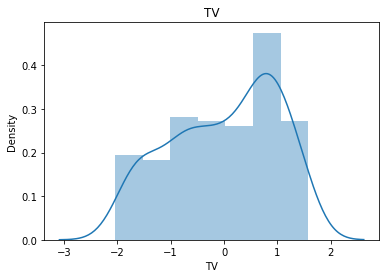

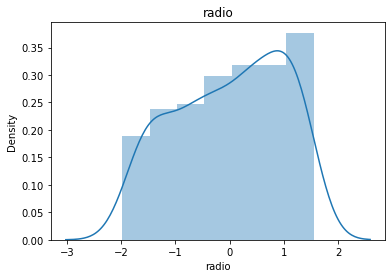

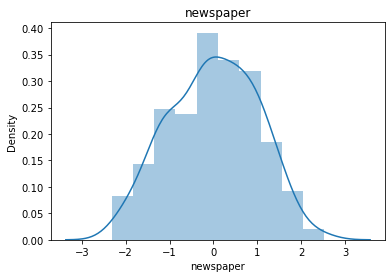

In [47]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

Now after removal of skewness, the curves cannot be normalized, but the skewness is reduced considerably in each columns

In [48]:
df1['sales']=chl_df['sales']

In [49]:
df1

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,22.1
1,-1.191314,1.040179,0.787683,10.4
2,-1.647757,1.370710,1.516998,9.3
3,0.141020,1.142387,1.214656,18.5
4,0.452715,-0.748651,1.211704,12.9
...,...,...,...,...
195,-1.287908,-1.431436,-0.682576,7.6
196,-0.520949,-1.297017,-1.142011,9.7
197,0.413091,-0.875492,-1.313050,12.8
198,1.455843,1.177722,1.433350,25.5


In [50]:
df1.shape

(200, 4)

# Check For Outliers

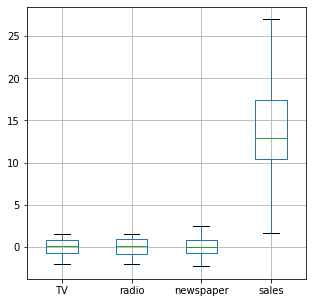

In [59]:
df1.boxplot(figsize=(5,5))
#plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:xlabel='TV'>

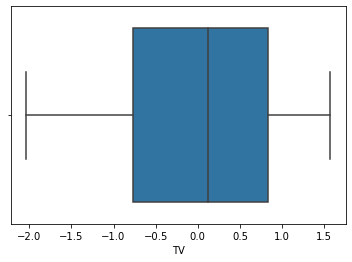

In [54]:
sns.boxplot(df1['TV'])

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.94867429, 0.96224689, 1.51433531, 1.55205313],
       [1.19131426, 1.0401788 , 0.78768252, 0.69604611],
       [1.6477566 , 1.37070964, 1.51699753, 0.90740587],
       [0.14102023, 1.14238689, 1.21465643, 0.86033029],
       [0.45271493, 0.74865064, 1.21170398, 0.21568303],
       [1.82382233, 1.51501853, 1.66502354, 1.31091086],
       [1.00249116, 0.69372704, 0.1077535 , 0.42704278],
       [0.210275  , 0.10158544, 0.84409341, 0.15803946],
       [1.82609501, 1.63345378, 2.13259669, 1.77205942],
       [0.64764492, 1.56676988, 0.22900395, 0.65761706],
       [0.88377378, 1.20298758, 0.07226156, 1.04190753],
       [0.79708355, 0.18072579, 1.60261898, 0.64897053],
       [1.52641627, 0.81900563, 1.42512925, 0.92662039],
       [0.48036844, 1.02813642, 1.22982506, 0.83054778],
       [0.69106577, 0.6992403 , 0.81860579, 0.9564029 ],
       [0.60295713, 1.45770359, 1.04432344, 1.6096967 ],
       [0.86079972, 0.89906999, 2.52943514, 0.29254112],
       [1.4355201 , 1.05563142,

In [65]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


There are no outliers present in the dataset.

# Spliting the data and Balancing 

In [67]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

The target variable is a continous type of data. So we shall use Linear Regression

# Train The Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Check the best Random State

# Linear Regression

In [72]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.9440103296887814 on Random_state 98


# To Find the Best Cross Validation Score 

In [74]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [78]:
train_score= r2_score(ytrain,pred_tr)
test_score= r2_score(ytest,pred_ts)

In [79]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_score} and the accuracy for testing is {test_score}")
    print("\n")

At cross fold 2 the cv score is 0.9042245206305917 and accuracy score for training is 0.905611595694469 and the accuracy for testing is 0.9032128200001172


At cross fold 3 the cv score is 0.9005133366024932 and accuracy score for training is 0.905611595694469 and the accuracy for testing is 0.9032128200001172


At cross fold 4 the cv score is 0.9010704953541406 and accuracy score for training is 0.905611595694469 and the accuracy for testing is 0.9032128200001172


At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is 0.905611595694469 and the accuracy for testing is 0.9032128200001172


At cross fold 6 the cv score is 0.9020141622653224 and accuracy score for training is 0.905611595694469 and the accuracy for testing is 0.9032128200001172


At cross fold 7 the cv score is 0.8982025458270028 and accuracy score for training is 0.905611595694469 and the accuracy for testing is 0.9032128200001172


At cross fold 8 the cv score is 0.8958223041714928 and acc

From the above results, Random_state is set to be 98, 

Cv_score is set to be 2 to train and test the models.

In [81]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=98)

# Linear Regression

In [82]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('Score:',lr.score(xtrain,ytrain))
print('mean_squared_error', mean_squared_error(ytest,predlr))
print('mean_absolute_error:', mean_absolute_error(predlr,ytest))
print('r2_score:', r2_score(predlr,ytest))

Score: 0.901698907605113
mean_squared_error 1.9887236948775702
mean_absolute_error: 1.124986925824589
r2_score: 0.9268245846879467


In [84]:
cr_lr=cross_val_score(lr,x,y, cv=2)
print('Cross Validation Score of LinearRegression is:', cr_lr.mean())

Cross Validation Score of LinearRegression is: 0.9042245206305917


R2 score and cross validation score are very close values, which indicates the model is performing well

# Decision Tree Regressor

In [85]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('mean_squared_error', mean_squared_error(ytest,preddtc))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 1.0
mean_squared_error 1.5835000000000008
mean_absolute_error: 0.9250000000000004
r2_score: 0.9465342656775984


In [86]:
cr_dtc=cross_val_score(dtc,x,y, cv=2)
print('Cross Validation Score of DecisionTreeRegressor is:', cr_dtc.mean())

Cross Validation Score of LinearRegression is: 0.91246696396725


In DecisionTreeRegressor, r2 score and CV score are nearly close to each other indicating good performance of the model

# RandomForestRegressor

In [87]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predrf))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

mean_squared_error 0.7427987499999948
mean_absolute_error: 0.6714499999999992
Rf Score 0.9969317575088863
r2_score: 0.97421178241722


In [89]:
cr_rf=cross_val_score(rf, x,y, cv=2)
print('Cross Validation Score of RandomForestRegressor is:', cr_rf.mean())

Cross Validation Score of RandomForestRegressor is: 0.9717695978966138


R2 score and cv score are equal here, so the model works perfectly well without any deviation

# SVR

In [90]:
svc=SVR(kernel='linear')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predsvc))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

mean_squared_error 2.085976337615712
mean_absolute_error: 1.1609641457661675
Score: 0.9011966349135316
r2_score: 0.9210014348200614


In [91]:
cv_svc=cross_val_score(svc, x,y, cv=2)
print('Cross Validation Score of SVR is:', cv_svc.mean())

Cross Validation Score of SVR is: 0.9024717959087372


r2 score and cv score here is also close indicating good performance.

Among all the models, RandomForestRegressor shows highest performance, the error is also very less. So we shall improve it with HyperParameter tuning

# HyperParameter Tuning With GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor

In [109]:
RandomForestRegressor()

RandomForestRegressor()

In [115]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'max_depth': [4,5,6,7,8],
            'criterion':["squared_error", "absolute_error", "poisson"],
            'min_samples_leaf': [1,2,3]}

GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=2, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [116]:
GCV.best_estimator_

RandomForestRegressor(max_depth=4)

In [114]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.9638309202878064

In [124]:
rf=RandomForestRegressor(max_depth=4,
                         criterion= 'squared_error',
                         max_features= 'auto',
                         min_samples_leaf= 1)
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predrf))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

mean_squared_error 1.2870908448463676
mean_absolute_error: 0.8928681642444362
Rf Score 0.9848758919999495
r2_score: 0.9509658913452168


With the best parameters used the performance of the model is stabilized to 95%, which shows that the model performs well with the dataset

# Save The Model

In [125]:
import pickle
filename= 'Advertising.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [126]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,17.1,18.036906
1,10.7,10.297487
2,18.0,16.597648
3,19.0,19.155260
4,23.8,21.913391
5,3.2,5.476939
6,12.6,13.035560
7,6.6,7.401040
8,15.5,15.426543
9,10.8,10.206716


After saving the model, if we compare the actual values to the predicted values the results are 95% close to the actual values indicating that the model workd well with the provided dataset